In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek
import numpy as np

importation des modules

In [2]:
y = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",index_col=1)

In [3]:
y

Province/State        Lat  \
Country/Region                                                        
Afghanistan                                          NaN  33.000000   
Albania                                              NaN  41.153300   
Algeria                                              NaN  28.033900   
Andorra                                              NaN  42.506300   
Angola                                               NaN -11.202700   
Antigua and Barbuda                                  NaN  17.060800   
Argentina                                            NaN -38.416100   
Armenia                                              NaN  40.069100   
Australia                   Australian Capital Territory -35.473500   
Australia                                New South Wales -33.868800   
Australia                             Northern Territory -12.463400   
Australia                                     Queensland -28.016700   
Australia                                South Australia -34.928500   
Australia                                       Tasmania -41.454500   
Australia                                       Victoria -37.813600   
Australia                              Western Australia -31.950500   
Austria                                              NaN  47.516200   
Azerbaijan                                           NaN  40.143100   
Bahamas                                              NaN  25.034300   
Bahrain                                              NaN  26.027500   
Bangladesh                                           NaN  23.685000   
Barbados                                             NaN  13.193900   
Belarus                                              NaN  53.709800   
Belgium                                              NaN  50.833300   
Benin                                                NaN   9.307700   
Bhutan                                               NaN  27.514200   
Bolivia                                              NaN -16.290200   
Bosnia and Herzegovina                               NaN  43.915900   
Brazil                                               NaN -14.235000   
Brunei                                               NaN   4.535300   
...                                                  ...        ...   
Timor-Leste                                          NaN  -8.874217   
Belize                                               NaN  13.193900   
Laos                                                 NaN  19.856270   
Libya                                                NaN  26.335100   
West Bank and Gaza                                   NaN  31.952200   
Guinea-Bissau                                        NaN  11.803700   
Mali                                                 NaN  17.570692   
Saint Kitts and Nevis                                NaN  17.357822   
Canada                             Northwest Territories  64.825500   
Canada                                             Yukon  64.282300   
Kosovo                                               NaN  42.602636   
Burma                                                NaN  21.916200   
United Kingdom                                  Anguilla  18.220600   
United Kingdom                    British Virgin Islands  18.420700   
United Kingdom                  Turks and Caicos Islands  21.694000   
MS Zaandam                                           NaN   0.000000   
Botswana                                             NaN -22.328500   
Burundi                                              NaN  -3.373100   
Sierra Leone                                         NaN   8.460555   
Netherlands             Bonaire, Sint Eustatius and Saba  12.178400   
Malawi                                               NaN -13.254308   
United Kingdom               Falkland Islands (Malvinas) -51.796300   
France                         Saint Pierre and Miquelon  46.885200   
South Sudan                                          NaN   6.87700

importation du datafram

In [4]:
y=y.drop(columns=['Lat','Long'])

suppression des colonnes 'Lat' et 'Long'

In [5]:
y

Province/State  1/22/20  1/23/20  \
Country/Region                                                               
Afghanistan                                          NaN        0        0   
Albania                                              NaN        0        0   
Algeria                                              NaN        0        0   
Andorra                                              NaN        0        0   
Angola                                               NaN        0        0   
Antigua and Barbuda                                  NaN        0        0   
Argentina                                            NaN        0        0   
Armenia                                              NaN        0        0   
Australia                   Australian Capital Territory        0        0   
Australia                                New South Wales        0        0   
Australia                             Northern Territory        0        0   
Australia                                     Queensland        0        0   
Australia                                South Australia        0        0   
Australia                                       Tasmania        0        0   
Australia                                       Victoria        0        0   
Australia                              Western Australia        0        0   
Austria                                              NaN        0        0   
Azerbaijan                                           NaN        0        0   
Bahamas                                              NaN        0        0   
Bahrain                                              NaN        0        0   
Bangladesh                                           NaN        0        0   
Barbados                                             NaN        0        0   
Belarus                                              NaN        0        0   
Belgium                                              NaN        0        0   
Benin                                                NaN        0        0   
Bhutan                                               NaN        0        0   
Bolivia                                              NaN        0        0   
Bosnia and Herzegovina                               NaN        0        0   
Brazil                                               NaN        0        0   
Brunei                                               NaN        0        0   
...                                                  ...      ...      ...   
Timor-Leste                                          NaN        0        0   
Belize                                               NaN        0        0   
Laos                                                 NaN        0        0   
Libya                                                NaN        0        0   
West Bank and Gaza                                   NaN        0        0   
Guinea-Bissau                                        NaN        0        0   
Mali                                                 NaN        0        0   
Saint Kitts and Nevis                                NaN        0        0   
Canada                             Northwest Territories        0        0   
Canada                                             Yukon        0        0   
Kosovo                                               NaN        0        0   
Burma                                                NaN        0        0   
United Kingdom                                  Anguilla        0        0   
United Kingdom                    British Virgin Islands        0        0   
United Kingdom                  Turks and Caicos Islands        0        0   
MS Zaandam                                           NaN        0        0   
Botswana                                             NaN        0        0   
Burundi                                              NaN        0        0   
Sierra Leone                                         NaN        

In [6]:
Belgique=y.loc[['Belgium'],:]
Chine=y.loc[['China'],:]
France=y.loc[['France'],:]
Allemagne=y.loc[['Germany'],:]
Iran=y.loc[['Iran'],:]
Italie=y.loc[['Italy'],:]
Japon=y.loc[['Japan'],:]
Hollande_et_colonies=y.loc[['Netherlands'],:]
Portugal=y.loc[['Portugal'],:]
Espagne=y.loc[['Spain'],:]
RoyaumeUni_et_colonies=y.loc[['United Kingdom'],:]
CoréeduSud=y.loc[['Korea, South'],:]
EtatsUnis=y.loc[['US'],:]

récupération des régions d'intérêt sauf pour Hong Kong

In [7]:
France_metropolitaine=France[France.isnull().any(axis=1)]
RoyaumeUnis=RoyaumeUni_et_colonies[RoyaumeUni_et_colonies.isnull().any(axis=1)]
Hollande=Hollande_et_colonies[Hollande_et_colonies.isnull().any(axis=1)]


In [8]:
France_metropolitaine

Province/State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                               
France                    NaN        0        0        2        3        3   

                1/27/20  1/28/20  1/29/20  1/30/20   ...     6/3/20  6/4/20  \
Country/Region                                       ...                      
France                3        4        5        5   ...     188836  185986   

                6/5/20  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  6/11/20  \
Country/Region                                                             
France          186538  187067  187360  187458  187599   187996   188354   

                6/12/20  
Country/Region           
France           188918  

[1 rows x 144 columns]

In [9]:
HongKong=Chine.iloc[[12],:]
Chine=Chine.drop(index='Hong Kong')

In [11]:
Chine

Province/State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                                
China                    Anhui        1        9       15       39       60   
China                  Beijing       14       22       36       41       68   
China                Chongqing        6        9       27       57       75   
China                   Fujian        1        5       10       18       35   
China                    Gansu        0        2        2        4        7   
China                Guangdong       26       32       53       78      111   
China                  Guangxi        2        5       23       23       36   
China                  Guizhou        1        3        3        4        5   
China                   Hainan        4        5        8       19       22   
China                    Hebei        1        1        2        8       13   
China             Heilongjiang        0        2        4        9       15   
China                    Henan        5        5        9       32       83   
China                Hong Kong        0        2        2        5        8   
China                    Hubei      444      444      549      761     1058   
China                    Hunan        4        9       24       43       69   
China           Inner Mongolia        0        0        1        7        7   
China                  Jiangsu        1        5        9       18       33   
China                  Jiangxi        2        7       18       18       36   
China                    Jilin        0        1        3        4        4   
China                 Liaoning        2        3        4       17       21   
China                    Macau        1        2        2        2        5   
China                  Ningxia        1        1        2        3        4   
China                  Qinghai        0        0        0        1        1   
China                  Shaanxi        0        3        5       15       22   
China                 Shandong        2        6       15       27       46   
China                 Shanghai        9       16       20       33       40   
China                   Shanxi        1        1        1        6        9   
China                  Sichuan        5        8       15       28       44   
China                  Tianjin        4        4        8       10       14   
China                    Tibet        0        0        0        0        0   
China                 Xinjiang        0        2        2        3        4   
China                   Yunnan        1        2        5       11       16   
China                 Zhejiang       10       27       43       62      104   

                1/27/20  1/28/20  1/29/20  1/30/20   ...     6/4/20  6/5/20  \
Country/Region                                       ...                      
China                70      106      152      200   ...        991     991   
China                80       91      111      114   ...        594     594   
China               110      132      147      182   ...        579     579   
China                59       80       84      101   ...        358     358   
China                14       19       24       26   ...        139     139   
China               151      207      277      354   ...       1598    1601   
China                46       51       58       78   ...        254     254   
China                 7        9        9       12   ...        147     147   
China                33       40       43       46   ...        169     169   
China                18       33       48       65   ...        328     328   
China                21       33       38       44   ...        947     947   
China               128      168      206      278   ...       1276    1276   
China                 8        8       10       10   ...       1099    1102   
China              1423     3554     3554     4903   ...      681

suppression des colonies et isolation de Hong Kong de la Chine

In [10]:
Belgique=Belgique.drop(columns=['Province/State'])
Chine=Chine.drop(columns=['Province/State'])
France_metropolitaine=France_metropolitaine.drop(columns=['Province/State'])
Allemagne=Allemagne.drop(columns=['Province/State'])
Iran=Iran.drop(columns=['Province/State'])
Italie=Italie.drop(columns=['Province/State'])
Japon=Japon.drop(columns=['Province/State'])
Hollande=Hollande.drop(columns=['Province/State'])
Portugal=Portugal.drop(columns=['Province/State'])
Espagne=Espagne.drop(columns=['Province/State'])
RoyaumeUnis=RoyaumeUnis.drop(columns=['Province/State'])
CoréeduSud=CoréeduSud.drop(columns=['Province/State'])
EtatsUnis=EtatsUnis.drop(columns=['Province/State'])


Suppression des colonnes province/etat sauf pour Hong Kong

In [11]:
SommeChine=Chine.sum()


In [14]:
print(SommeChine)

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
1/27/20     2877
1/28/20     5509
1/29/20     6087
1/30/20     8141
1/31/20     9802
2/1/20     11891
2/2/20     16630
2/3/20     19716
2/4/20     23707
2/5/20     27440
2/6/20     30587
2/7/20     34110
2/8/20     36814
2/9/20     39829
2/10/20    42354
2/11/20    44386
2/12/20    44759
2/13/20    59895
2/14/20    66358
2/15/20    68413
2/16/20    70513
2/17/20    72434
2/18/20    74211
2/19/20    74619
2/20/20    75077
           ...  
5/14/20    84029
5/15/20    84038
5/16/20    84044
5/17/20    84054
5/18/20    84063
5/19/20    84063
5/20/20    84063
5/21/20    84063
5/22/20    84081
5/23/20    84084
5/24/20    84095
5/25/20    84102
5/26/20    84103
5/27/20    84106
5/28/20    84106
5/29/20    84123
5/30/20    84128
5/31/20    84146
6/1/20     84154
6/2/20     84161
6/3/20     84160
6/4/20     84171
6/5/20     84177
6/6/20     84186
6/7/20     84191
6/8/20     84195
6/9/20     84198
6/10/20    842

In [15]:
HongKong=HongKong.drop(columns='Province/State')

In [17]:
HongKong.rename('Conutry/Region')

TypeError: 'str' object is not callable

In [20]:
Belgique=Belgique.T
France=France_metropolitaine.T
Allemagne=Allemagne.T
Iran=Iran.T
Italie=Italie.T
Japon=Japon.T
Hollande=Hollande.T
Portugal=Portugal.T
Espagne=Espagne.T
RoyaumeUnis=RoyaumeUnis.T
CoreeduSud=CoréeduSud.T
EtatsUnis=EtatsUnis.T
HongKong=HongKong.T

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-with-list-with-missing-labels-is-deprecated
https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

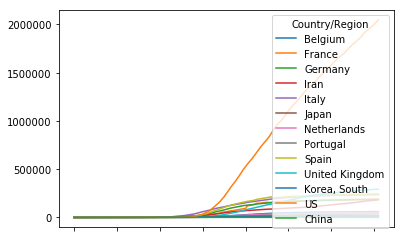

In [21]:
pd.concat([Belgique,France,Allemagne,Iran,Italie,Japon,Hollande,Portugal,Espagne,RoyaumeUnis,CoreeduSud,EtatsUnis,HongKong,SommeChine],axis=1).plot()

Plotter,
SommeChine=0
HongKong=China

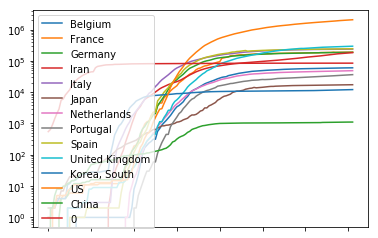

In [23]:
pd.concat([Belgique,France,Allemagne,Iran,Italie,Japon,Hollande,Portugal,Espagne,RoyaumeUnis,CoreeduSud,EtatsUnis,HongKong,SommeChine],axis=1).plot(logy=True)

plotter en log,
SommeChine=0
HongKong=China

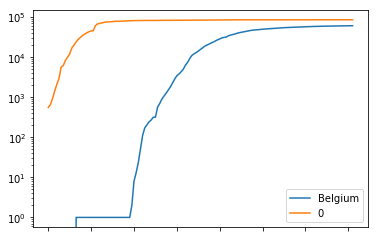

In [24]:
pd.concat([Belgique,SommeChine],axis=1).plot(logy=True)

In [ ]:
La suite c est pas encore important

df=pd.concat([Belgique],axis=1)

plt.figure();

Belgique.plot(label='dates').set(y_label("nombredemalades"))

In [ ]:
plt.figure();

Belgique.plot(style='k--', label='Series');

In [ ]:
a=pd.concat([Belgique,France,Allemagne,Iran,Italie,Japon,Hollande,Portugal,Espagne,RoyaumeUnis,CoreeduSud,EtatsUnis],axis=1)

In [ ]:
a.plot().set_xlabel('dates')

In [ ]:
axes = pyplot.gca()
axes.set_xlabel('axe des x')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",index_col=1)

In [ ]:
df

In [ ]:
df=df.drop(columns=['Lat','Long'])


In [ ]:
Belgique1=df.loc[['Belgium'],:]
Chine1=df.loc[['China'],:]
France1=df.loc[['France'],:]
Allemagne1=df.loc[['Germany'],:]
Iran1=df.loc[['Iran'],:]
Italie1=df.loc[['Italy'],:]
Japon1=df.loc[['Japan'],:]
Hollande_et_colonies1=df.loc[['Netherlands'],:]
Portugal1=df.loc[['Portugal'],:]
Espagne1=df.loc[['Spain'],:]
RoyaumeUni_et_colonies1=df.loc[['United Kingdom'],:]
CoréeduSud1=df.loc[['Korea, South'],:]
EtatsUnis1=df.loc[['US'],:]

In [ ]:
France1

In [ ]:
France_metropolitaine=France1[France1.isnull().any(axis=1)]
RoyaumeUnis=RoyaumeUni_et_colonies1[RoyaumeUni_et_colonies1.isnull().any(axis=1)]
Hollande=Hollande_et_colonies1[Hollande_et_colonies1.isnull().any(axis=1)]
HongKong1=Chine1.iloc[[12],:]

In [ ]:
France1=France1.T

In [ ]:
F=France1.groupby(level=0, axis=1).sum()